<a href="https://colab.research.google.com/github/jisusP/Articulo/blob/main/Esteroides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tanimoto con base en las huellas dactilares de Morgan**

In [ ]:
!pip install numpy
!pip install rdkit
!pip install seaborn
!pip install matplotlib.pyplot

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import scipy.cluster.hierarchy as shc

In [11]:
esteroides = {}
smiles = []
with open("/content/SMILES_Grafos.txt", "r") as archivo:
  #f = archivo.read()
  lineas = archivo.readlines()

  for id, line in enumerate(lineas):
    smiles.append(line)
    esteroides[f"CM{id+1}"] = [Chem.MolFromSmiles(line)]

fps_dicc={}
for i, llave in enumerate(esteroides):
  fps_dicc[f"fp{i+1}"] = [AllChem.GetMorganFingerprint(esteroides[llave][0], 2)]

#print(fps)
#DataStructs.TanimotoSimilarity(fps["fp1"][0], fps["fp1"][0])



In [ ]:
similarity_matrix = np.zeros((len(fps_dicc), len(fps_dicc)))
for i in range(len(fps_dicc)):
    for j in range(i+1, len(fps_dicc)):
        similarity = DataStructs.TanimotoSimilarity(fps_dicc[f"fp{i+1}"][0], fps_dicc[f"fp{j+1}"][0])
        #similarity = DataStructs.TanimotoSimilarity(fps[i], fps[j])
        similarity_matrix[i][j] = similarity
        similarity_matrix[j][i] = similarity
print(similarity_matrix)

In [ ]:
similitud_tanimoto = 1-(similarity_matrix)
print(similitud_tanimoto)

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(similitud_tanimoto, annot=False, cbar=True, square=True, cmap='viridis')

labels = [i for i in fps_dicc]
LogK = ["5.322","9.114","9.176","7.462","7.146","6.342","6.204","6.431","7.819","7.380","7.204","9.740","8.832","6.633","8.176","6.146","7.146","6.362","6.944","6.996","9.204"]
plt.xticks(np.arange(len(labels)) + 0.5, LogK, rotation=45, ha='right')
plt.yticks(np.arange(len(labels)) + 0.5, labels, rotation=45, ha='right')
# Configurar el aspecto del heatmap
plt.title("Tanimoto (esteroles)")
plt.xlabel
plt.ylabel

# Mostrar el heatmap
plt.show()

In [ ]:
plt.figure(figsize=(18,5))
plt.title("Tanimoto (esteroles)")
d = shc.dendrogram(shc.linkage(similitud_tanimoto, method = "ward"), labels = LogK)

# **Randic con base en su número atómico promedio, utilizando la matriz de Barysz**

In [ ]:
def randic_index(smiles):
  mol = Chem.MolFromSmiles(smiles)
  if mol is None:
    return None
  atomic_numbers = [atom.GetAtomicNum() for atom in mol.GetAtoms()]

    # Construir la matriz de Barysz ponderada por el número atómico
  barysz_matrix = np.zeros((len(atomic_numbers), len(atomic_numbers)))

  for bond in mol.GetBonds():
      i = bond.GetBeginAtomIdx()
      j = bond.GetEndAtomIdx()

      # Ponderar el elemento de la matriz por el número atómico promedio
      weight = (atomic_numbers[i] + atomic_numbers[j]) / 2.0
      barysz_matrix[i, j] = weight
      barysz_matrix[j, i] = weight
  #M_adyacencia = Chem.GetAdjacencyMatrix(mol)

  N_atoms = mol.GetNumAtoms()
  Grado_conectividad = np.sum(barysz_matrix, axis=1)
  randic = 0
  for i in range(N_atoms):
    for j in range(i+1, N_atoms):
      if barysz_matrix[i, j] != 0:
        randic += 1 /(Grado_conectividad[i] * Grado_conectividad[j])**0.5
  return randic#, Grado_conectividad

def randic_similarity(ri1, ri2):
  return 1 - abs(ri1 - ri2)

randic = []
for smile in smiles:
  randic.append(randic_index(smile))

similarity_matrix_randic = [[randic_similarity(ri1, ri2) for ri2 in randic] for ri1 in randic]
distance_matrix_randic = [[1 - randic_similarity(ri1, ri2) for ri2 in randic] for ri1 in randic]

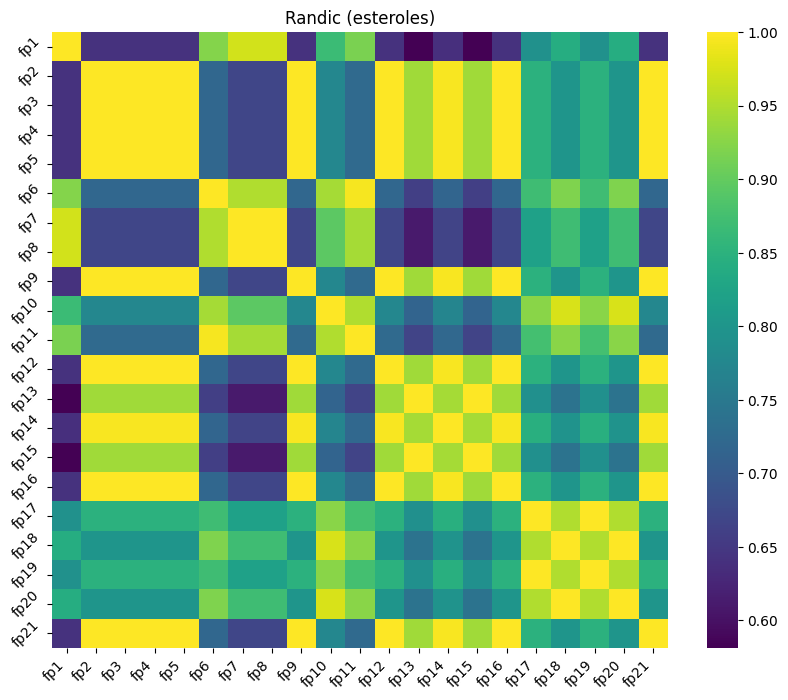

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix_randic, annot=False, cbar=True, square=True, cmap='viridis')

plt.xticks(np.arange(len(labels)) + 0.5, labels, rotation=45, ha='right')
plt.yticks(np.arange(len(labels)) + 0.5, labels, rotation=45, ha='right')
# Configurar el aspecto del heatmap
plt.title("Randic (esteroles)")
plt.xlabel
plt.ylabel

# Mostrar el heatmap
plt.show()

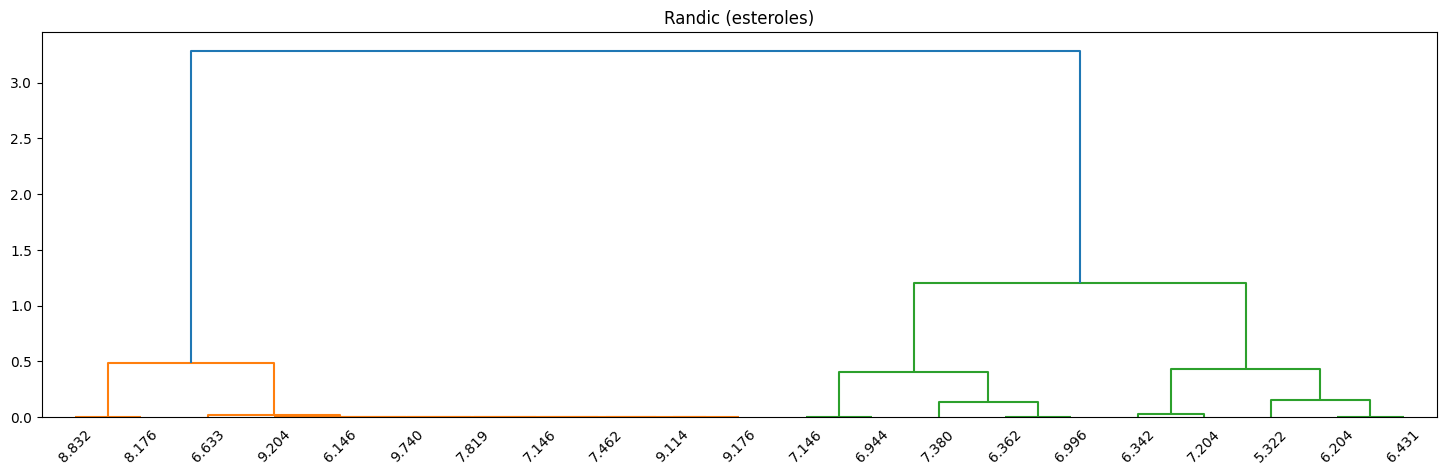

In [ ]:
plt.figure(figsize=(18,5))
plt.title("Randic (esteroles)")
d = shc.dendrogram(shc.linkage(similarity_matrix_randic, method = "ward"), labels = LogK)

# **Coeficiente coseno**

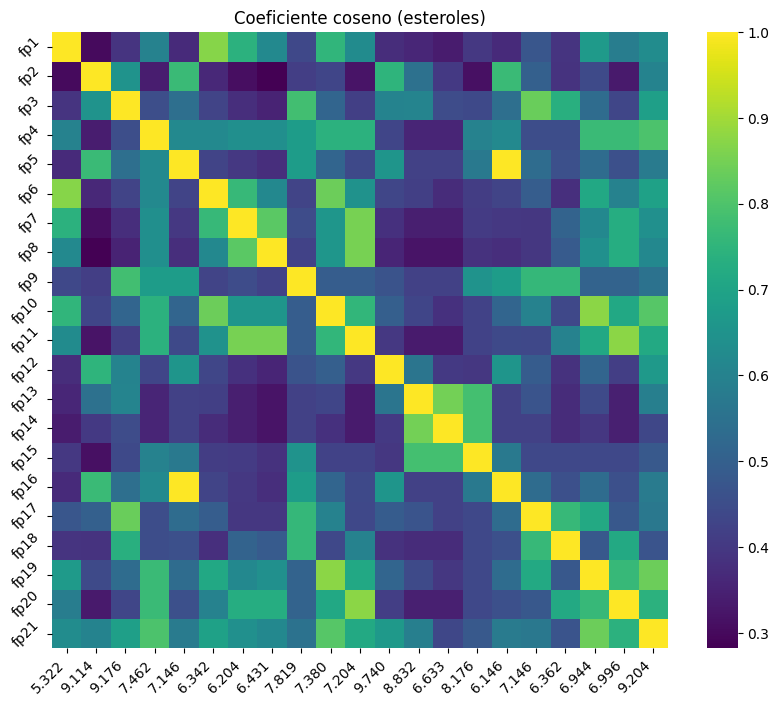

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

#fingerprints de manera vectorizada, ya que sin el "AsBitVect" nos arroja error
fps = [AllChem.GetMorganFingerprintAsBitVect(esteroides[mol][0], 2, nBits=1024) for id, mol in enumerate(esteroides)]
similarity_matrix_cos = cosine_similarity(fps)
distance_matrix_cos = 1 - similarity_matrix_cos

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix_cos, annot=False, cbar=True, square=True, cmap='viridis')
plt.xticks(np.arange(len(labels)) + 0.5, LogK, rotation=45, ha='right')
plt.yticks(np.arange(len(labels)) + 0.5, labels, rotation=45, ha='right')
# Configurar el aspecto del heatmap
plt.title("Coeficiente coseno (esteroles)")
plt.xlabel
plt.ylabel

# Mostrar el heatmap
plt.show()

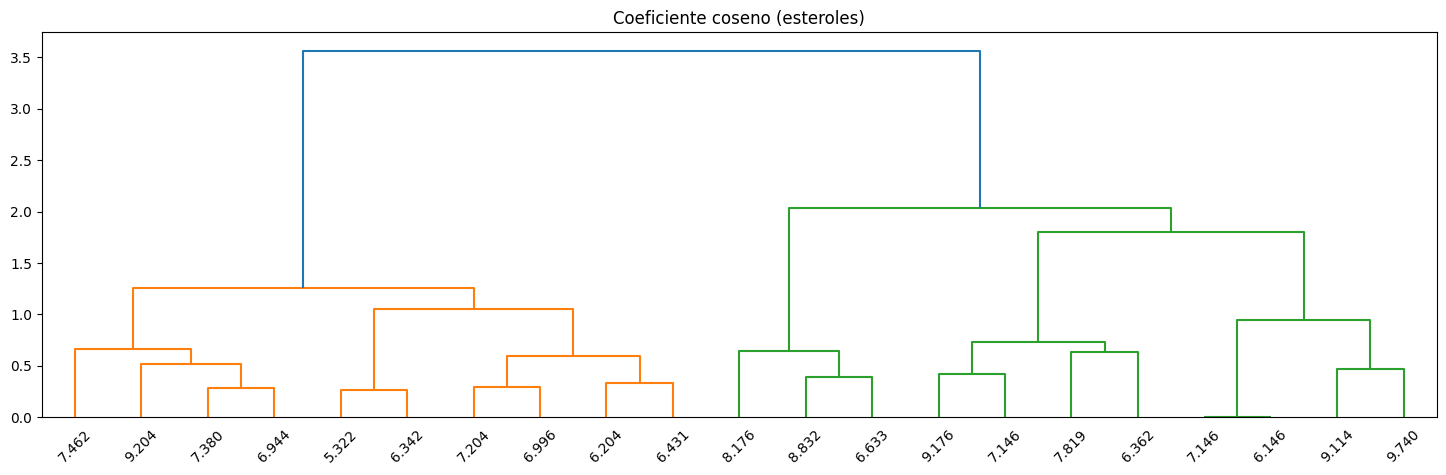

In [38]:
plt.figure(figsize=(18,5))
plt.title("Coeficiente coseno (esteroles)")
d = shc.dendrogram(shc.linkage(similarity_matrix_cos, method = "ward"), labels = LogK)

# **Distancia euclidiana**

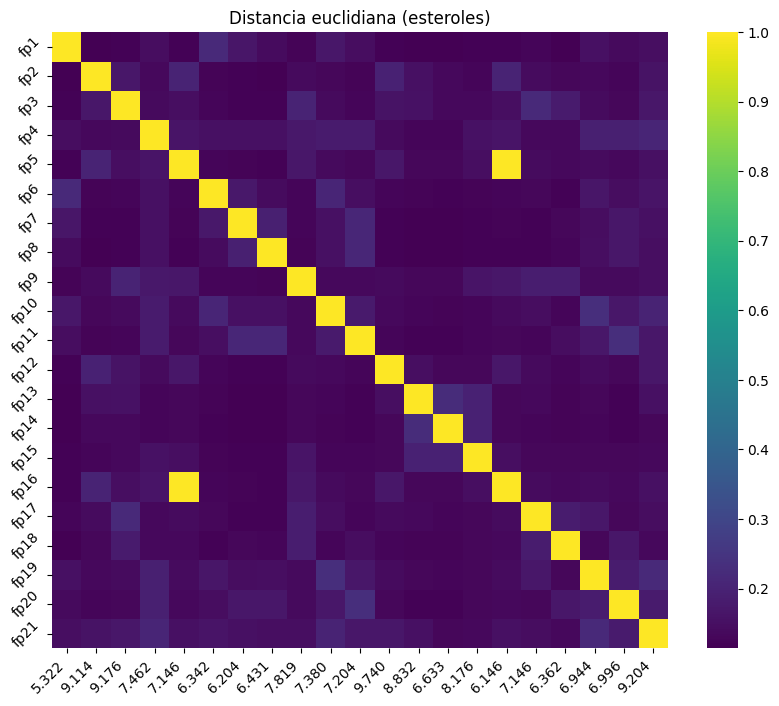

In [42]:
from scipy.spatial.distance import pdist, squareform

#El fps se utilizó en el código del coeficiente de coseno
distance_matrix_euc = squareform(pdist(fps, 'euclidean'))
similarity_matrix_euc = 1 / (1 + distance_matrix_euc)

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix_euc, annot=False, cbar=True, square=True, cmap='viridis')
plt.xticks(np.arange(len(labels)) + 0.5, LogK, rotation=45, ha='right')
plt.yticks(np.arange(len(labels)) + 0.5, labels, rotation=45, ha='right')
# Configurar el aspecto del heatmap
plt.title("Distancia euclidiana (esteroles)")
plt.xlabel
plt.ylabel

# Mostrar el heatmap
plt.show()

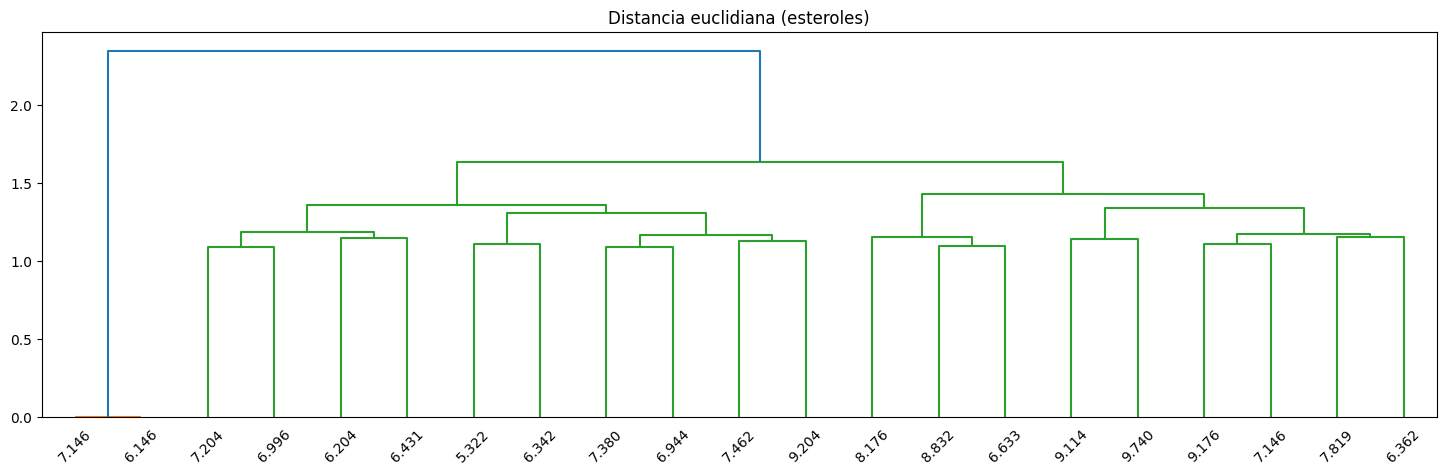

In [40]:
plt.figure(figsize=(18,5))
plt.title("Distancia euclidiana (esteroles)")
d = shc.dendrogram(shc.linkage(similarity_matrix_euc, method = "ward"), labels = LogK)